[*********************100%%**********************]  1 of 1 completed


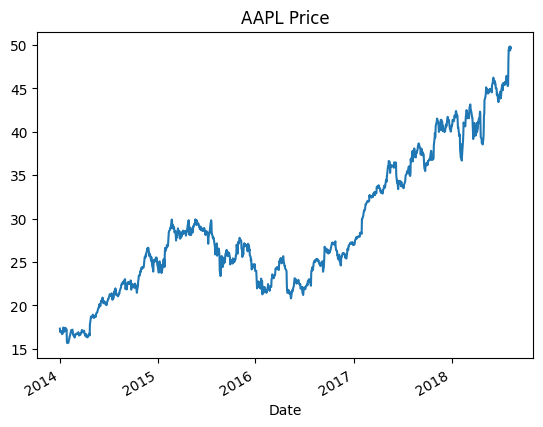

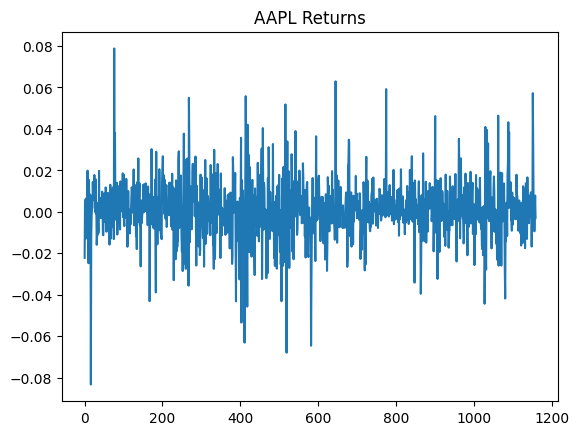

[*********************100%%**********************]  1 of 1 completed


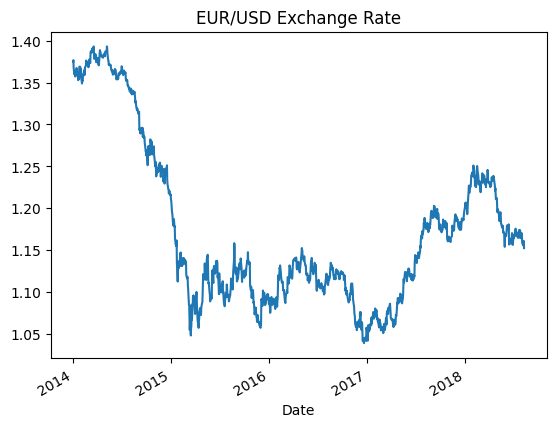

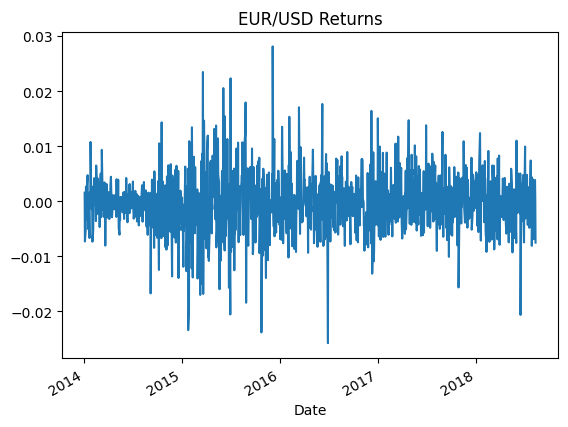

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller

# Download AAPL data
aapl = yf.download('AAPL', start='2010-01-01', end='2018-08-13')
aapl = aapl['Adj Close'].last('5Y')  # Last 5 years of data
price_aapl = aapl
ret_aapl = np.diff(np.log(price_aapl))

# Plot
price_aapl.plot(title='AAPL Price')
plt.show()
pd.Series(ret_aapl).plot(title='AAPL Returns')
plt.show()

# Download Euro to USD data
euro_usd = yf.download('EURUSD=X', start='2010-01-01', end='2018-08-13')
euro_usd = euro_usd['Adj Close'].last('5Y')  # Last 5 years of data
euro_usd.dropna(inplace=True)  # Remove missing values

# Calculate returns
ret_euro_usd = np.diff(np.log(euro_usd))

# Plot
euro_usd.plot(title='EUR/USD Exchange Rate')
plt.show()
pd.Series(ret_euro_usd, index=euro_usd.index[1:]).plot(title='EUR/USD Returns')
plt.show()



ACF Values for Price ACF for AAPL:
Lag 0: 1.0
Lag 1: 0.9947971549974722
Lag 2: 0.9893138162695332
Lag 3: 0.9839893251787993
Lag 4: 0.9786688970354804
Lag 5: 0.973134907087331
Lag 6: 0.9676346568617006
Lag 7: 0.9621989304061285
Lag 8: 0.9570388352759313
Lag 9: 0.9529012225276957
Lag 10: 0.9488070051184307
Lag 11: 0.9446109948177758
Lag 12: 0.9402363498016658
Lag 13: 0.93597604602309
Lag 14: 0.9319365343879136
Lag 15: 0.9279261672438012
Lag 16: 0.9239112943697507
Lag 17: 0.9198720244781879
Lag 18: 0.915594714503665
Lag 19: 0.9112316321997561
Lag 20: 0.9068034044568967


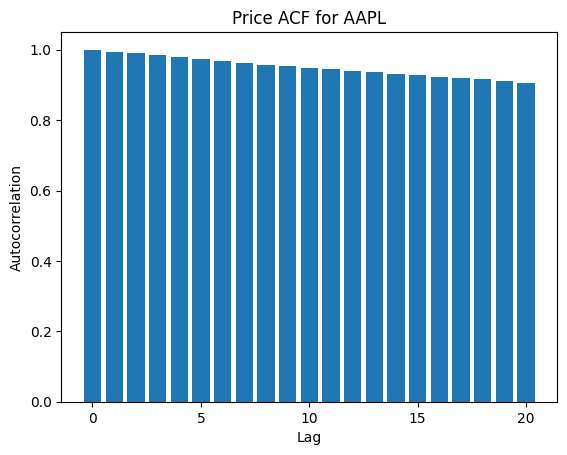

ACF Values for Return ACF for AAPL:
Lag 0: 1.0
Lag 1: 0.040819644825927356
Lag 2: -0.012079164062247854
Lag 3: -0.02148799904060848
Lag 4: 0.006194501470940303
Lag 5: -0.004999189372066085
Lag 6: -0.012495499470571776
Lag 7: 0.05389488841369124
Lag 8: -0.05503118520249411
Lag 9: 0.010837769859141881
Lag 10: -0.011176523479943294
Lag 11: -0.03008308871207084
Lag 12: -0.027268516219588583
Lag 13: -0.02567162327466477
Lag 14: 0.028245119556457175
Lag 15: -0.0030212675909592345
Lag 16: 0.01301411031785669
Lag 17: 0.03173469258188537
Lag 18: -0.020473130985800045
Lag 19: 0.016462275111017863
Lag 20: 0.02592670206827541


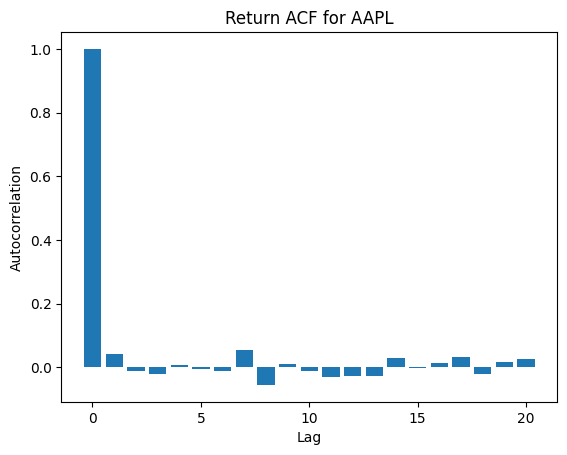

ACF Values for Price ACF for EUR/USD:
Lag 0: 1.0
Lag 1: 0.9960514586136587
Lag 2: 0.9923057822142407
Lag 3: 0.9887679016426042
Lag 4: 0.985376129290431
Lag 5: 0.9819250187087398
Lag 6: 0.9783556109075648
Lag 7: 0.9751369710073847
Lag 8: 0.9717969996082482
Lag 9: 0.9682765917583238
Lag 10: 0.9647291138683353
Lag 11: 0.9613097091103763
Lag 12: 0.957904326380847
Lag 13: 0.9544376583088517
Lag 14: 0.9512546197280122
Lag 15: 0.9480654473625002
Lag 16: 0.9450212561408498
Lag 17: 0.9419392240803682
Lag 18: 0.9387584461783746
Lag 19: 0.9356336869107985
Lag 20: 0.9323358153936889


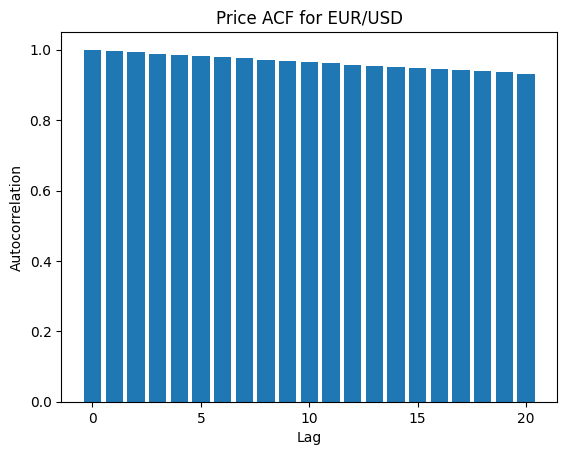

ACF Values for Return ACF for EUR/USD:
Lag 0: 1.0
Lag 1: -0.053736572756609306
Lag 2: -0.006670660328462521
Lag 3: -0.00472133332210144
Lag 4: 0.002647595542220785
Lag 5: 0.03402255057972144
Lag 6: -0.062081986474200206
Lag 7: 0.009928962575008323
Lag 8: 0.013204117698973162
Lag 9: 0.0038088671094586527
Lag 10: -0.03612444470357548
Lag 11: 0.028603750444321355
Lag 12: 0.0008631311979798991
Lag 13: -0.02675106876313575
Lag 14: -0.014604297529807263
Lag 15: -0.04298121105934014
Lag 16: 0.013587784622886975
Lag 17: -0.04380358617050148
Lag 18: -0.015007266594819766
Lag 19: 0.04363867612026285
Lag 20: 0.013339164529341247


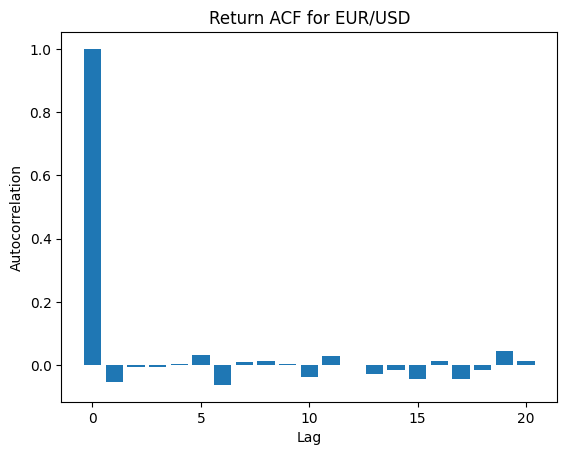

In [10]:
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt

def print_and_plot_acf(series, lags=20, title='ACF'):
    # Handle Pandas Series and DataFrame input
    if isinstance(series, pd.Series):
        series = series.dropna()  # Ensure no NaN values
    elif isinstance(series, pd.DataFrame):
        series = series.iloc[:, 0].dropna()  # Use first column and drop NaNs

    # Calculate the autocorrelation function
    acf_values = acf(series, nlags=lags, fft=True)

    # Printing the ACF values
    print(f'ACF Values for {title}:')
    for lag, value in enumerate(acf_values):
        print(f'Lag {lag}: {value}')

    # Plotting the ACF
    plt.bar(range(len(acf_values)), acf_values)
    plt.title(title)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.show()

# Using the function with your data
print_and_plot_acf(price_aapl, title='Price ACF for AAPL')
print_and_plot_acf(pd.Series(ret_aapl, index=price_aapl.index[1:]), title='Return ACF for AAPL')
print_and_plot_acf(euro_usd, title='Price ACF for EUR/USD')
print_and_plot_acf(pd.Series(ret_euro_usd, index=euro_usd.index[1:]), title='Return ACF for EUR/USD')


In [11]:
# AR(1) Model for AAPL
Y = np.log(price_aapl)
model_ar1 = AutoReg(Y[1:], lags=1).fit()
print(model_ar1.summary())


                            AutoReg Model Results                             
Dep. Variable:              Adj Close   No. Observations:                 1160
Model:                     AutoReg(1)   Log Likelihood                3277.776
Method:               Conditional MLE   S.D. of innovations              0.014
Date:                Tue, 05 Dec 2023   AIC                          -6549.552
Time:                        19:47:18   BIC                          -6534.386
Sample:                             1   HQIC                         -6543.830
                                 1160                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0039      0.005      0.751      0.453      -0.006       0.014
Adj Close.L1     0.9991      0.002    641.318      0.000       0.996       1.002
                                    Roots   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [13]:
def adf_test(series, title):
    # Convert pandas DataFrame or Series to a one-dimensional numpy array
    if isinstance(series, pd.DataFrame):
        series = series.iloc[:, 0].values  # Convert to numpy array (first column)
    elif isinstance(series, pd.Series):
        series = series.values  # Convert to numpy array

    # Perform the ADF test
    result = adfuller(series, autolag='AIC')
    print(f'ADF Test for {title}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')
    print('\n')

# Apply the ADF test to your time series data
adf_test(price_aapl, 'Price AAPL')
adf_test(pd.Series(ret_aapl), 'Return AAPL')  # Ensure ret_aapl is a Series
adf_test(euro_usd, 'Price EURO/USD')          # Assuming euro_usd is your euro data
adf_test(pd.Series(ret_euro_usd), 'Return EURO/USD')  # Ensure ret_euro_usd is a Series



ADF Test for Price AAPL:
ADF Statistic: 0.3656087461071307
p-value: 0.9801622616427308
Critical Value 1%: -3.436039176245612
Critical Value 5%: -2.8640521575678655
Critical Value 10%: -2.5681075333056036


ADF Test for Return AAPL:
ADF Statistic: -32.68917969079246
p-value: 0.0
Critical Value 1%: -3.4360047388340984
Critical Value 5%: -2.8640369654502846
Critical Value 10%: -2.5680994423132613


ADF Test for Price EURO/USD:
ADF Statistic: -2.1075019781213453
p-value: 0.24150873828234704
Critical Value 1%: -3.4358156841149765
Critical Value 5%: -2.8639535605738278
Critical Value 10%: -2.568055023174024


ADF Test for Return EURO/USD:
ADF Statistic: -36.486350932210925
p-value: 0.0
Critical Value 1%: -3.4358156841149765
Critical Value 5%: -2.8639535605738278
Critical Value 10%: -2.568055023174024




In [14]:
import pandas as pd

# Assuming the data is stored in a CSV file named 'macro.csv'
df = pd.read_csv('/content/macro.csv')

# Convert 'Unnamed: 0' to a datetime format and set as index
df['Date'] = pd.to_datetime(df['Unnamed: 0'], format='%YM%m')
df.set_index('Date', inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)

# Display the first few rows of the dataframe
print(df.head())


            USTB3M  USTB6M  USTB1Y  USTB3Y  USTB5Y  USTB10Y
Date                                                       
1986-03-01    7.01    7.10    7.22    7.51    7.66     8.01
1986-04-01    6.50    6.59    6.67    7.03    7.22     7.39
1986-05-01    6.29    6.43    6.56    7.07    7.21     7.44
1986-06-01    6.62    6.79    7.00    7.74    8.02     8.23
1986-07-01    6.14    6.20    6.36    6.99    7.21     7.35


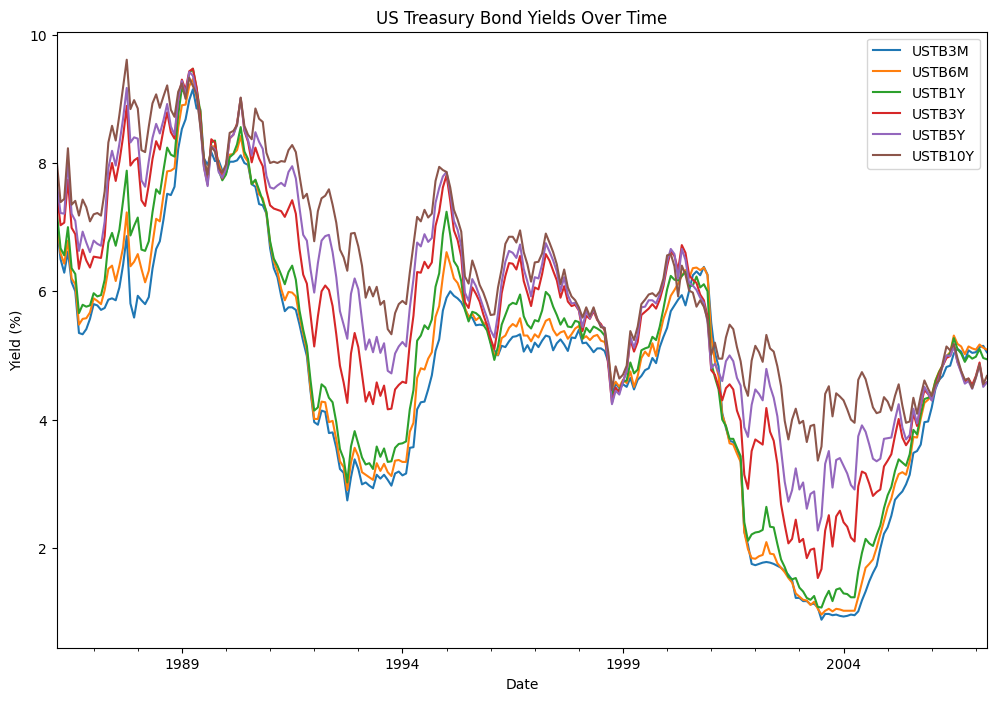

In [15]:
import matplotlib.pyplot as plt

df.plot(figsize=(12, 8), title='US Treasury Bond Yields Over Time')
plt.ylabel('Yield (%)')
plt.show()


In [16]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    print(f'ADF Test on "{title}"')
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')
    print('\n')

# Perform ADF test on each column
for column in df.columns:
    adf_test(df[column], title=column)


ADF Test on "USTB3M"
ADF Statistic: -2.515082540848854
p-value: 0.1118475748736738
Critical Value (1%): -3.4575505077947746
Critical Value (5%): -2.8735087323013526
Critical Value (10%): -2.573148434859185


ADF Test on "USTB6M"
ADF Statistic: -2.3308045888437183
p-value: 0.16222523359753233
Critical Value (1%): -3.4575505077947746
Critical Value (5%): -2.8735087323013526
Critical Value (10%): -2.573148434859185


ADF Test on "USTB1Y"
ADF Statistic: -2.0480596444154417
p-value: 0.26590599201646725
Critical Value (1%): -3.4575505077947746
Critical Value (5%): -2.8735087323013526
Critical Value (10%): -2.573148434859185


ADF Test on "USTB3Y"
ADF Statistic: -1.6745074733470888
p-value: 0.44429252847396744
Critical Value (1%): -3.4565688966099373
Critical Value (5%): -2.8730786194395455
Critical Value (10%): -2.5729189953388762


ADF Test on "USTB5Y"
ADF Statistic: -1.5493027431075663
p-value: 0.5089964662693159
Critical Value (1%): -3.4566744514553016
Critical Value (5%): -2.873124876778

In [17]:
import pandas as pd

df = pd.read_csv('/content/macro.csv')
df['Date'] = pd.to_datetime(df['Unnamed: 0'], format='%YM%m')
df.set_index('Date', inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)


In [18]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def johansen_cointegration_test(df, det_order=-1, k_ar_diff=1):
    result = coint_johansen(df, det_order, k_ar_diff)
    trace_stats = result.lr1
    crit_vals = result.cvt[:, 1]  # 5% critical values
    for i in range(len(trace_stats)):
        print(f'Eigenvalue {i}: Trace Statistic = {trace_stats[i]}, 5% Critical Value = {crit_vals[i]}')

# Select a subset of columns for the test
selected_columns = ['USTB1Y', 'USTB6M']  # Replace with your columns of interest
johansen_cointegration_test(df[selected_columns])


Eigenvalue 0: Trace Statistic = 18.2601484005863, 5% Critical Value = 12.3212
Eigenvalue 1: Trace Statistic = 0.8332798247866287, 5% Critical Value = 4.1296


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 05, Dec, 2023
Time:                     19:55:27
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -28.0789
Nobs:                     251.000    HQIC:                  -28.7335
Log likelihood:           1602.47    FPE:                2.13774e-13
AIC:                     -29.1744    Det(Omega_mle):     1.57897e-13
--------------------------------------------------------------------
Results for equation USTB3M
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             -0.003149         0.013468           -0.234           0.815
L1.USTB3M          0.093681         0.181089            0.517           0.605
L1.USTB6M         -0.176731         0.308254           -0.573          

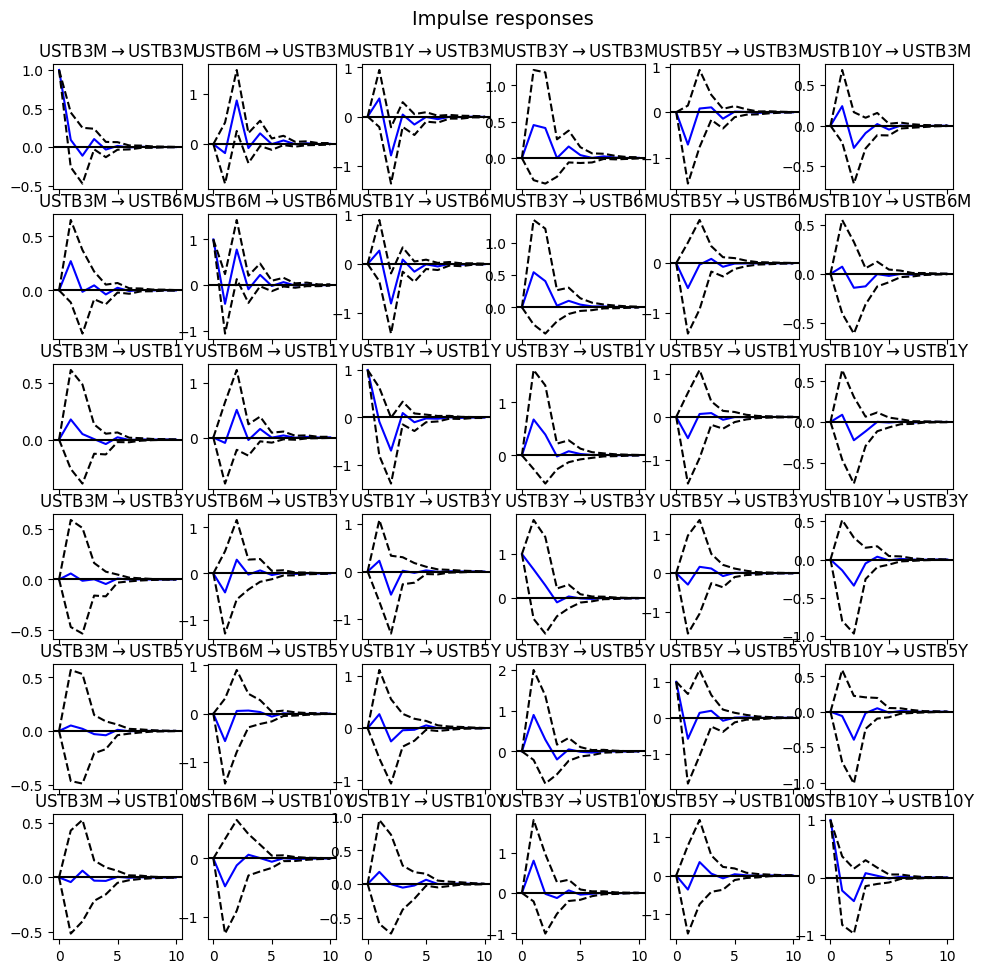

In [19]:
from statsmodels.tsa.api import VAR

# Example: using differenced data if it's non-stationary
d_df = df.diff().dropna()

model_var = VAR(d_df)
results_var = model_var.fit(maxlags=8, ic='aic')
print(results_var.summary())

# Impulse Response
irf = results_var.irf(10)
irf.plot()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Det. terms outside the coint. relation & lagged endog. parameters for equation USTB1Y
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.USTB1Y      0.2931      0.193      1.516      0.130      -0.086       0.672
L1.USTB6M     -0.0754      0.212     -0.356      0.722      -0.490       0.340
Det. terms outside the coint. relation & lagged endog. parameters for equation USTB6M
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.USTB1Y      0.2833      0.169      1.674      0.094      -0.048       0.615
L1.USTB6M     -0.0621      0.185     -0.335      0.737      -0.425       0.301
               Loading coefficients (alpha) for equation USTB1Y               
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

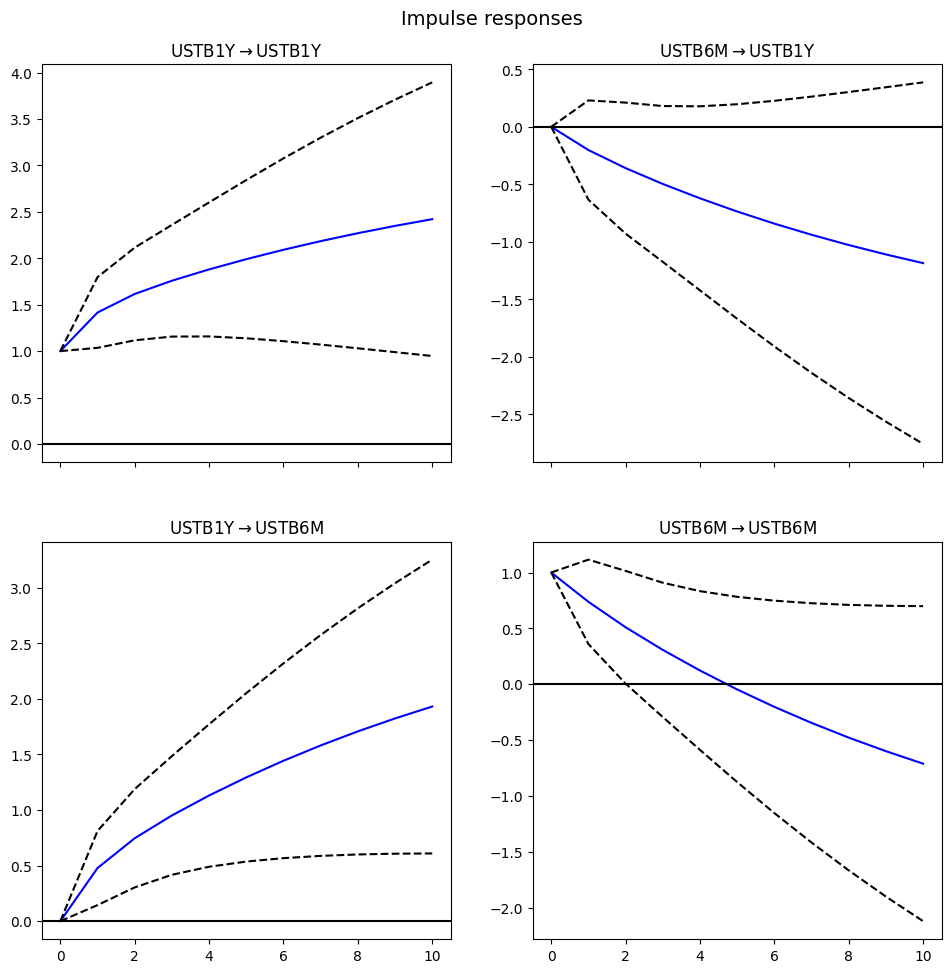

In [20]:
from statsmodels.tsa.vector_ar.vecm import VECM

vecm_model = VECM(df[selected_columns], k_ar_diff=1, coint_rank=1)
vecm_result = vecm_model.fit()
print(vecm_result.summary())

# Impulse Response Function
irf = vecm_result.irf(10)
irf.plot(orth=False)
plt.show()
